In [ ]:
#SVM

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [35]:
#importacao do dataset: dataset ìris

from sklearn.datasets import load_iris
data = load_iris()
iris = pd.DataFrame(data['data'], columns=data.feature_names)
target = data.target

In [36]:
#Importando o algoritmo de SVM

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svc = SVC(gamma='auto')

In [37]:
#Testanto o modelo 'svc' na nossa base iris

#A validação cruzada é um dos modos mais comuns de se treinar modelos,
#pois ela divide o conjunto de dados em (k-1)/k partições de treinamento e 
#1/k de teste de maneira circular e interativa, tendo assim todas as 1/k possíveis partições,
# podendo ser testadas contra o resto.

cv_result = cross_val_score(svc, iris, target, cv=10, scoring='accuracy')

print('Acurácia com cross validation:',cv_result.mean()*100)

Acurácia com cross validation: 98.00000000000001


In [38]:
svc.fit(iris, target)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


c:\Users\Panda\svmTeste\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Iris')

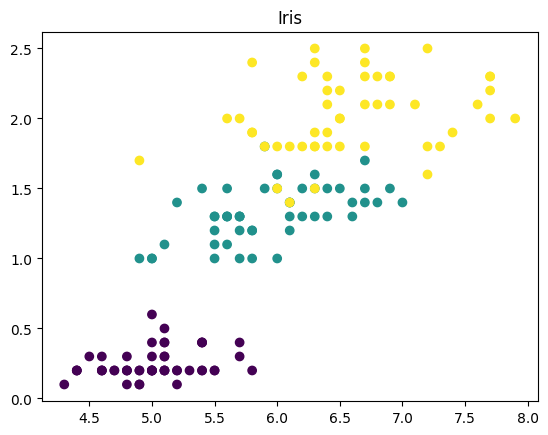

In [39]:
#Prediz a que classe pertencerá a flor com sépala de comprimento 6.9 cm e de largura 2.8 cm, 
#e com pétala de comprimento 6.1 cm e de largura 2.3 cm

svc.predict([[6.9,2.8,6.1,2.3]])

plt.scatter(iris['sepal length (cm)'], iris['petal width (cm)'], c=target)

plt.title('Iris')

c:\Users\Panda\svmTeste\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


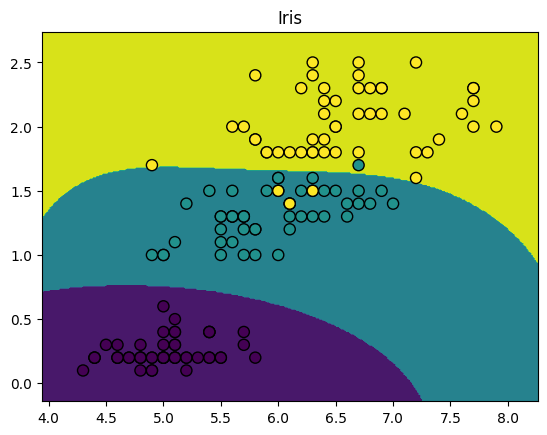

In [40]:
#Provavelmente, criando 2 features novas no íris, o svm com 2 features terá mais sucesso, mas por enquanto usei só
#sepal length e petal width (os mais relevantes das 4 features já existentes)

x0_min, x0_max = iris['sepal length (cm)'].min(), iris['sepal length (cm)'].max()
x1_min, x1_max = iris['petal width (cm)'].min(), iris['petal width (cm)'].max()
w = x0_max - x0_min
h = x1_max - x1_min
x0, x1 = np.meshgrid(np.linspace(x0_min-.1*w, x0_max+.1*w, 300),
                          np.linspace(x1_min-.1*h, x1_max+.1*h, 300))
svc.fit(iris[['sepal length (cm)', 'petal width (cm)']], target)
ypred = svc.predict(np.c_[x0.reshape(-1, 1), x1.reshape(-1, 1)])
ypred = ypred.reshape(x0.shape)

plt.contourf(x0, x1, ypred)
plt.scatter(iris['sepal length (cm)'], iris['petal width (cm)'], c=target, s=64, edgecolors='k')
plt.title('Iris')
plt.show()